## Analisis exploratorio forecast GFS

In [62]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [48]:
#File
path = 'apcp_sfc_2013031600_c00.grib2'

#Open file

ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:     (step: 80, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 ...
    time        datetime64[ns] ...
  * step        (step) timedelta64[ns] 0 days 03:00:00 ... 10 days 00:00:00
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (step) datetime64[ns] ...
Data variables:
    tp          (step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          2
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-08-18T15:54 GRIB to CDM+CF via cfgrib-0.9.1...

Las dimensiones de mi dataset son stepxlatxlong. 80steps

In [44]:
ds.longitude.attrs

{'units': 'degrees_east',
 'standard_name': 'longitude',
 'long_name': 'longitude'}

In [191]:
ds.tp.attrs

{'GRIB_paramId': 228228,
 'GRIB_dataType': 'cf',
 'GRIB_numberOfPoints': 1038240,
 'GRIB_typeOfLevel': 'surface',
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'accum',
 'GRIB_gridType': 'regular_ll',
 'GRIB_NV': 0,
 'GRIB_Nx': 1440,
 'GRIB_Ny': 721,
 'GRIB_cfName': 'unknown',
 'GRIB_cfVarName': 'unknown',
 'GRIB_gridDefinitionDescription': 'Latitude/longitude. Also called equidistant cylindrical, or Plate Carree',
 'GRIB_iDirectionIncrementInDegrees': 0.25,
 'GRIB_iScansNegatively': 0,
 'GRIB_jDirectionIncrementInDegrees': 0.25,
 'GRIB_jPointsAreConsecutive': 0,
 'GRIB_jScansPositively': 0,
 'GRIB_latitudeOfFirstGridPointInDegrees': 90.0,
 'GRIB_latitudeOfLastGridPointInDegrees': -90.0,
 'GRIB_longitudeOfFirstGridPointInDegrees': 0.0,
 'GRIB_longitudeOfLastGridPointInDegrees': 359.75,
 'GRIB_missingValue': 3.4028234663852886e+38,
 'GRIB_name': 'Total Precipitation',
 'GRIB_shortName': 'tp',
 'GRIB_totalNumber': 20,
 'GRIB_units': 'kg m**-2',
 'long_name': 'Total Precipitation',
 'units': 'k

In [50]:
for v in ds:
    print("{}, {}, {}".format(v, ds[v].attrs["long_name"], ds[v].attrs["units"]))

tp, Total Precipitation, kg m**-2


In [181]:
np.datetime64(ds.time.values+np.timedelta64(ds.step[10].values))

numpy.datetime64('2013-03-17T09:00:00.000000000')

In [49]:
#Selecciona la lluvia
ds.get('tp')

<xarray.DataArray 'tp' (step: 80, latitude: 721, longitude: 1440)>
[83059200 values with dtype=float32]
Coordinates:
    number      int64 ...
    time        datetime64[ns] ...
  * step        (step) timedelta64[ns] 0 days 03:00:00 ... 10 days 00:00:00
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (step) datetime64[ns] ...
Attributes: (12/30)
    GRIB_paramId:                             228228
    GRIB_dataType:                            cf
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_shortName:                           tp
    GRIB_totalNumber:                         20
    GRIB_units:                               kg m**-2
    long_name:                                Total Precipitation
    units:                                    kg m**-2
    standard_name:                            unknown

In [60]:
pp

<xarray.DataArray 'tp' (latitude: 721, longitude: 1440)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    number      int64 0
    time        datetime64[ns] 2013-03-16
    step        timedelta64[ns] 4 days 09:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  datetime64[ns] 2013-03-20T09:00:00
Attributes: (12/30)
    GRIB_paramId:                             228228
    GRIB_dataType:                            cf
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_shortName:                           tp
    GRIB_totalNumber:                         20
    GRIB_units:                               kg m**-2
    long_name:                                Total Precipitation
    units:                                    kg m**-2
    standard_name:                            unknown

In [58]:
algo.plot.pcolormesh()

TypeError: No numeric data to plot.

In [76]:
algo = pp[lat_index,lon_index]
algo.shape

(267, 319)

In [46]:
for v in ds.attrs:
    print(v)

GRIB_edition
GRIB_centre
GRIB_centreDescription
GRIB_subCentre
Conventions
institution
history


In [154]:

# Obtener el valor entero de la marca de tiempo de inicio
marca_tiempo_inicio_int = ds.time.values.item(0)

# Convertir el valor entero a un objeto numpy.datetime64
marca_tiempo_inicio = np.datetime64(marca_tiempo_inicio_int, 's')

# Formatear la marca de tiempo en un formato legible
fecha_hora_inicio = marca_tiempo_inicio.astype('O').strftime('%Y-%m-%d %H:%M:%S')

# Imprimir la fecha y hora de inicio en formato legible
print("Fecha y hora de inicio:", fecha_hora_inicio)


AttributeError: 'int' object has no attribute 'strftime'

In [153]:

algo = ds.time.values.item(0)
np.datetime64(algo, 's').astype('O').strftime('%Y-%m-%d %H:%M:%S')

# Formatear la marca de tiempo en un formato legible
#fecha_hora_inicio = marca_tiempo_inicio.astype('O').strftime('%Y-%m-%d %H:%M:%S')

# Imprimir la fecha y hora de inicio en formato legible
#print("Fecha y hora de inicio:", fecha_hora_inicio)


AttributeError: 'int' object has no attribute 'strftime'

In [155]:

marca_tiempo_inicio = ds.time.values

# Formatear la marca de tiempo en un formato legible
fecha_hora_inicio = marca_tiempo_inicio.astype('O').strftime('%Y-%m-%d %H:%M:%S')

# Imprimir la fecha y hora de inicio en formato legible
print("Fecha y hora de inicio:", fecha_hora_inicio)


AttributeError: 'int' object has no attribute 'strftime'

In [159]:
from datetime import datetime
cadena_original = '2013-03-16T00:00:00.000000000'

# Formatear la cadena en un formato más legible
fecha_hora_legible = datetime.strptime(cadena_original, '%Y-%m-%dT%H:%M:%S.%f').strftime('%d-%m-%Y %H:%M:%S')

# Imprimir la fecha y hora legible
print("Fecha y hora legible:", fecha_hora_legible)

ValueError: unconverted data remains: 000

In [160]:
from datetime import datetime

# Cadena de fecha y hora en formato original
cadena_original = '2013-03-16T00:00:00.000000000'

# Formatear la cadena en un formato más legible (sin microsegundos)
fecha_hora_legible = datetime.strptime(cadena_original, '%Y-%m-%dT%H:%M:%S').strftime('%d-%m-%Y %H:%M:%S')

# Imprimir la fecha y hora legible
print("Fecha y hora legible:", fecha_hora_legible)


ValueError: unconverted data remains: .000000000

In [161]:
from datetime import datetime

# Cadena de fecha y hora en formato original
cadena_original = '2013-03-16T00:00:00.000000000'

# Eliminar la parte de los microsegundos
cadena_sin_microsegundos = cadena_original.split('.')[0]

# Formatear la cadena en un formato más legible
fecha_hora_legible = datetime.strptime(cadena_sin_microsegundos, '%Y-%m-%dT%H:%M:%S').strftime('%d-%m-%Y %H:%M:%S')

# Imprimir la fecha y hora legible
print("Fecha y hora legible:", fecha_hora_legible)


Fecha y hora legible: 16-03-2013 00:00:00


In [157]:
ds.time.values.astype(str)

'2013-03-16T00:00:00.000000000'

In [137]:
algo.strftime('%Y-%m-%d %H:%M:%S')


AttributeError: 'int' object has no attribute 'strftime'

In [75]:
#Latitudes y longitudes (box)

lat_north = 12
lat_south = -55
lon_east = 340
lon_west = 260

#latitudes
lat_index = np.flatnonzero((ds.latitude.values <lat_north) & (ds.latitude.values > lat_south))

#longitudes
lon_index = np.flatnonzero((ds.longitude.values > lon_west) & (ds.longitude.values < lon_east))


In [61]:
lon_index

array([1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127,
       1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138,
       1139])

In [8]:
pp[lat_index[0]:lat_]

('latitude', 'longitude')

In [49]:
#Extraigo el datase de 
var = ds.tp

#Referencia del tiempo
paso = ds.step[34]

pp = var.sel(step = paso)

In [100]:
#Accedemos de esta manera ya que ds.time es un numpy.core.datarray.DataArray
ds.time.values

numpy.datetime64('2013-03-16T00:00:00.000000000')

In [115]:
ds.time.values

numpy.datetime64('2013-03-16T00:00:00.000000000')

In [119]:
np.timedelta64(ds.step[-1].values,'s')

numpy.timedelta64(864000,'s')

In [121]:
#Latitudxlongitudn
ds.time.values+np.timedelta64(ds.step[-1].values,'s')

numpy.datetime64('2013-03-26T00:00:00.000000000')

In [28]:
#Extraigo latitudes y longitudes
lat = var.latitude
lon = var.longitude

/home/fernando.huaranca/.conda/envs/tesis/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/fernando.huaranca/.conda/envs/tesis/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


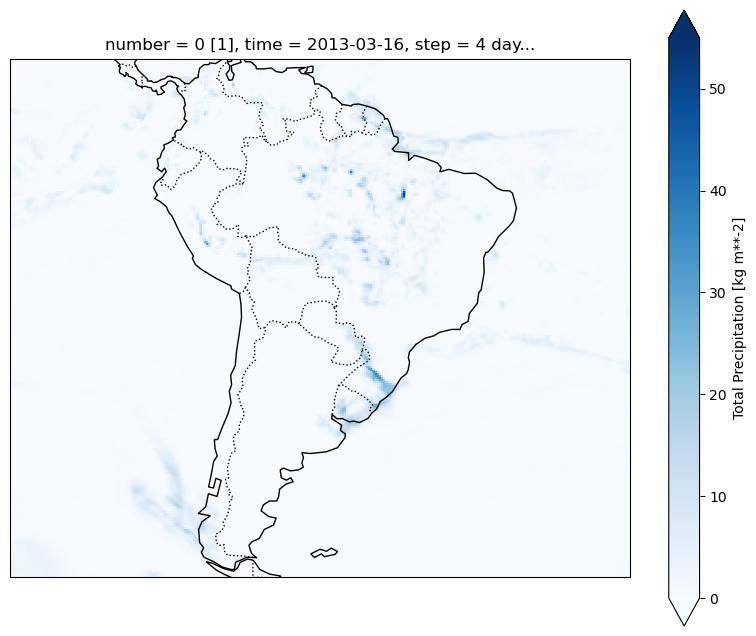

In [77]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
algo.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', extend='both')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
